<a href="https://www.kaggle.com/code/krishnaprasad2608/amazon-vs-facebook-risk-and-returns?scriptVersionId=171438120" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
The Sharpe Ratio is the risk-adjusted return of a portfolio measured by dividing the excess return by the standard deviation of the portfolio.

In my current project, I'm diving into the Sharpe ratio, specifically by calculating it for the stocks of two tech giants, Facebook and Amazon. As a benchmark, I'm using the S&P 500, which measures the performance of the largest 500 stocks in the US. To add another layer of insight, I'll be exploring the Information Ratio, a metric that helps me understand how much more return a portfolio manager earns compared to a basic index fund. Join me in unraveling the intricacies of investment strategies and portfolio management in this hands-on exploration!

**# Dataset Description:**

**Benchmark Dataset:**

* **Date**: The timestamp indicating when the data point was recorded.
* **S&P 500**: The value of the S&P 500 index on the corresponding date, reflecting the performance of the 500 largest publicly traded companies in the US. This serves as a benchmark for evaluating the overall market movement.

**Stock Dataset:**

* **Date:** The timestamp corresponding to the stock data entry.
* **Amazon:** The stock value of Amazon on the given date, representing the market valuation of the Amazon company's shares.
* **Facebook:** The stock value of Facebook on the given date, representing the market valuation of Facebook company's shares.


**Importing Required packages:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the datasets**

In [2]:
stock_data = pd.read_csv('/kaggle/input/risk-and-returns/stock_data.csv')

In [3]:
# the first few rows of the DataFrame
stock_data.head()

,Date,Amazon,Facebook
0,2016-01-04,636.989990,102.220001
1,2016-01-05,633.789978,102.730003
2,2016-01-06,632.650024,102.970001
3,2016-01-07,607.940002,97.919998
4,2016-01-08,607.049988,97.330002


In [4]:
stock_data.dtypes

Date         object
Amazon      float64
Facebook    float64
dtype: object

In [5]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

In [6]:
# Drop rows with missing values
stock_data = stock_data.dropna()

In [7]:
# Performing the same for benchmark data:

benchmark_data = pd.read_csv('/kaggle/input/risk-and-returns/benchmark_data.csv')

benchmark_data['Date'] = pd.to_datetime(benchmark_data['Date'])
benchmark_data.set_index('Date', inplace=True)

In [8]:
# Drop rows with missing values
benchmark_data = benchmark_data.dropna()

In [9]:
# Initial look at the datasets

benchmark_data.head()

,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03


In [10]:
stock_data.head()

,Amazon,Facebook
Date,,
2016-01-04,636.989990,102.220001
2016-01-05,633.789978,102.730003
2016-01-06,632.650024,102.970001
2016-01-07,607.940002,97.919998
2016-01-08,607.049988,97.330002


# **Daily Prices for Amazon and Facebook**

Prior to comparing the investment performance of Facebook or Amazon against the index comprising the 500 largest US companies, let's visualize the data. This step will enhance our understanding of the dataset before conducting a detailed analysis.

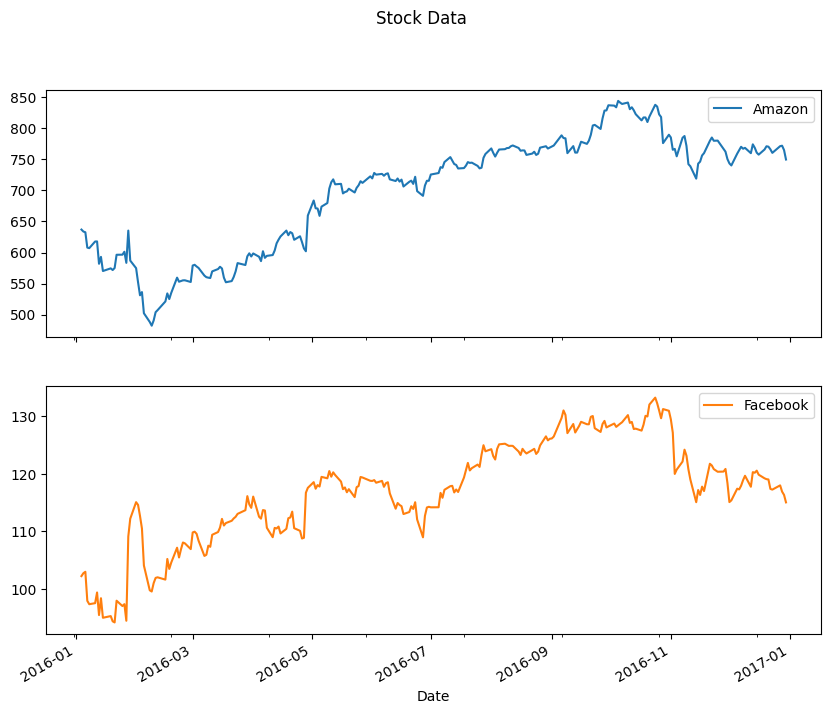

In [11]:
# Plot each column in stock_data s
stock_data.plot(subplots=True, figsize=(10, 8), title='Stock Data', grid=False)

# Display the plots
plt.show()

# **Daily Prices benchmark**


Additionally, let's examine the value of the S&P 500, which serves as our benchmark.

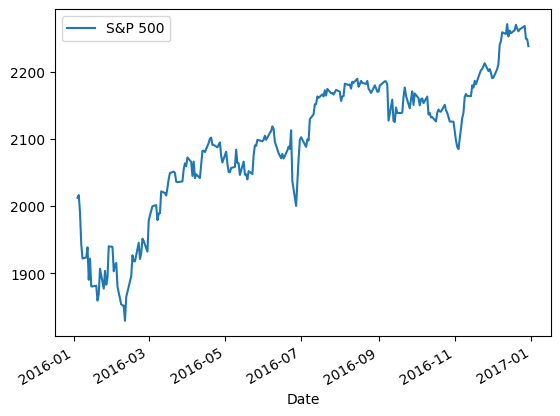

In [12]:
# Plot the benchmark data 
benchmark_data.plot(grid=False)

# Display the plot
plt.show()

# **Daily Stock Returns**

**Sharpe Ratio Basics:**
* Measures the difference in returns between two investment options.
* Compares the risk-adjusted performance.

**Data Representation:**
* Current data represents historical values, not returns.

**Return Calculation:**
* To calculate return, we find the percentage change from one day to the next.

**Summary Statistics Exploration:**
* Examining summary statistics as inputs for Sharpe Ratio calculations.

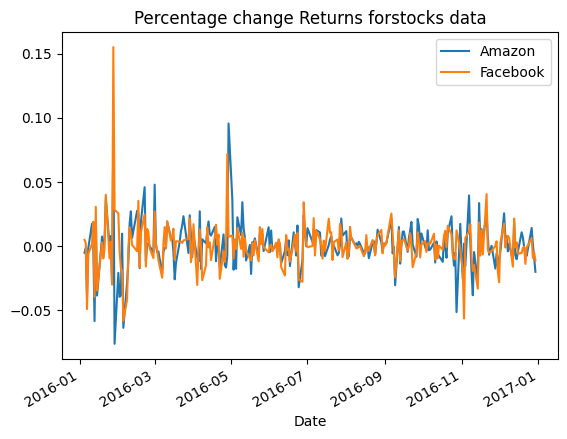

In [13]:
# Calculate daily returns for stock_data
stock_returns = stock_data.pct_change()

# Plot the daily returns
stock_returns.plot(title='Percentage change Returns forstocks data',grid=False)

# Display the plot
plt.show()

# **Daily S&P 500 returns**


To find daily returns for the S&P 500, follow the same process. Make sure to treat it as a Series by using single brackets [] for smoother calculations in the next step.

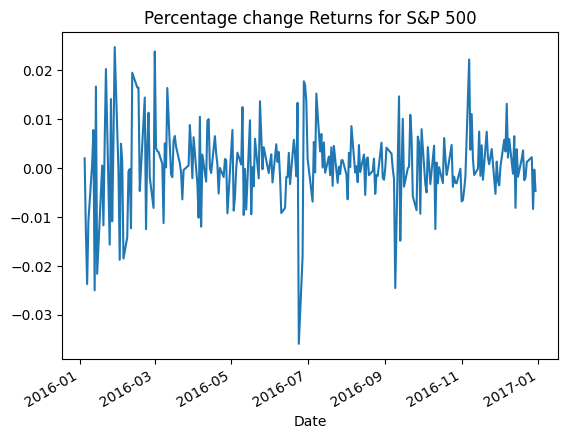

In [14]:
# Calculate daily returns for benchmark_data
sp_returns = benchmark_data['S&P 500'].pct_change()

# Plot the daily returns 
sp_returns.plot(title='Percentage change Returns for S&P 500',grid=False)

# Display the plot
plt.show()

# **Excess Returns: Amazon, Facebook vs. S&P 500**

Moving forward, let's determine the stocks' relative performance compared to the S&P 500 benchmark. This is computed by finding the difference in returns between stock_returns and sp_returns for each day.

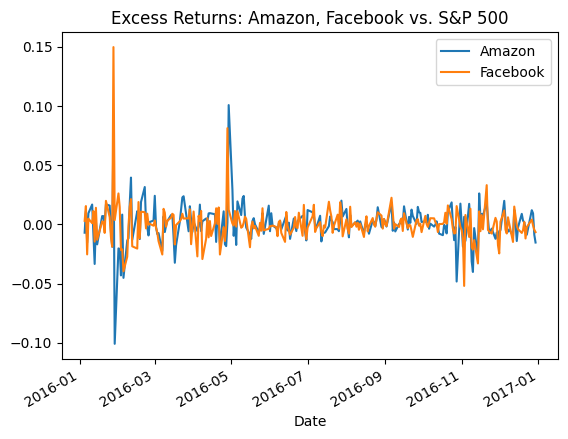

In [15]:
# Calculate the daily difference 
excess_returns = stock_returns.subtract(sp_returns, axis=0)

# Plot the excess returns 
excess_returns.plot(grid=False)
plt.title('Excess Returns: Amazon, Facebook vs. S&P 500')

# Display the plot
plt.show()

# **Sharpe Ratio Step 1: Average Daily Returns Difference between Stocks and S&P 500**


* Initiating the calculation of the Sharpe Ratio.
* First step involves determining the average of the excess returns.
* This provides insight into the daily outperformance or underperformance of the investment relative to the benchmark.

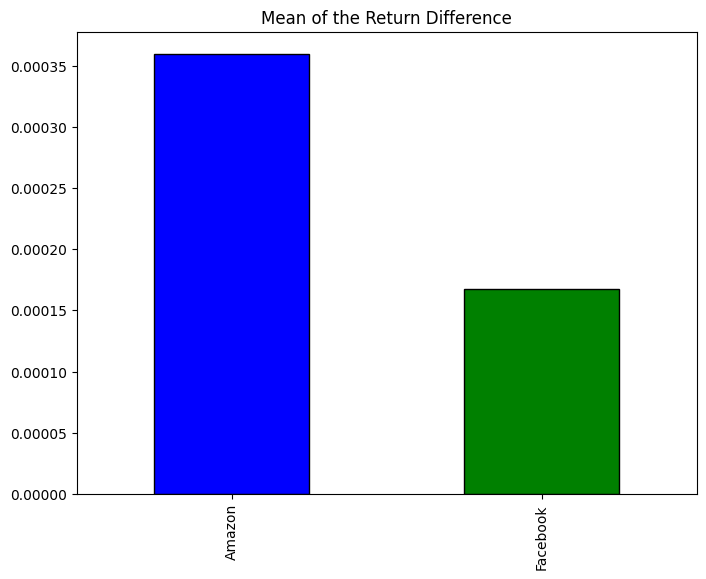

In [16]:
# Calculate the mean of excess returns
avg_excess_return = excess_returns.mean()

# Plot the mean of excess returns 
ax = avg_excess_return.plot.bar(title='Mean of the Return Difference', color=['blue', 'green'], figsize=(8, 6), edgecolor='black')
ax.yaxis.grid(False)

# Display the plot
plt.show()


# **Sharpe Ratio Step 2: Volatility in the Return Difference**

**Observation on Returns:**
* Noticeable difference in average daily returns for Amazon and Facebook.

**Calculating Standard Deviation:**
* Proceeding to compute the standard deviation of the excess returns.
* This metric indicates the level of risk associated with investing in the stocks compared to investing in the S&P 500.

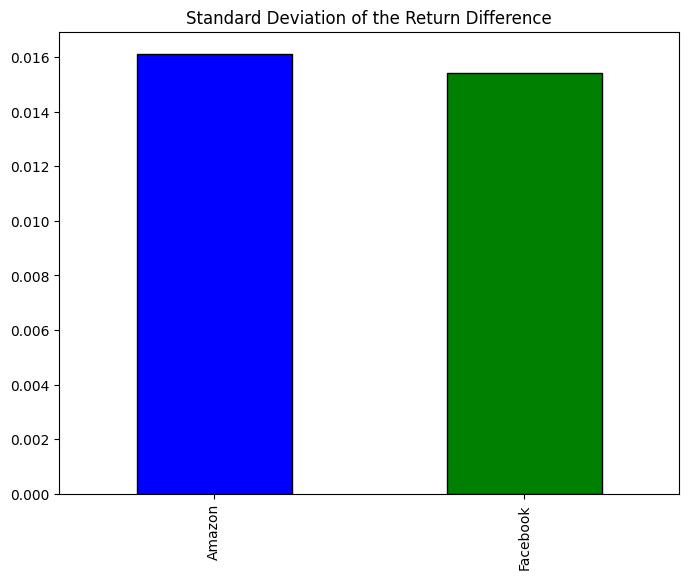

In [17]:
# Calculate the standard deviations of excess returns
sd_excess_return = excess_returns.std()

# Plot the standard deviations of excess returns 
ax = sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference', color=['blue', 'green'], grid=False, figsize=(8, 6), edgecolor='black')
ax.yaxis.grid(False)

# Display the plot
plt.show()


# **Combining All Elements**

**Final Step: Computing Sharpe Ratio:**
* Determine the ratio of avg_excess_returns to sd_excess_returns.
* This ratio signifies the Sharpe ratio, revealing the investment's return relative to its risk.

**Annualization of Sharpe Ratio:**
* Sharpe Ratio is often annualized for better interpretation.
* Multiply the daily ratio by the square root of the number of trading days (approximately 252 days in a year).

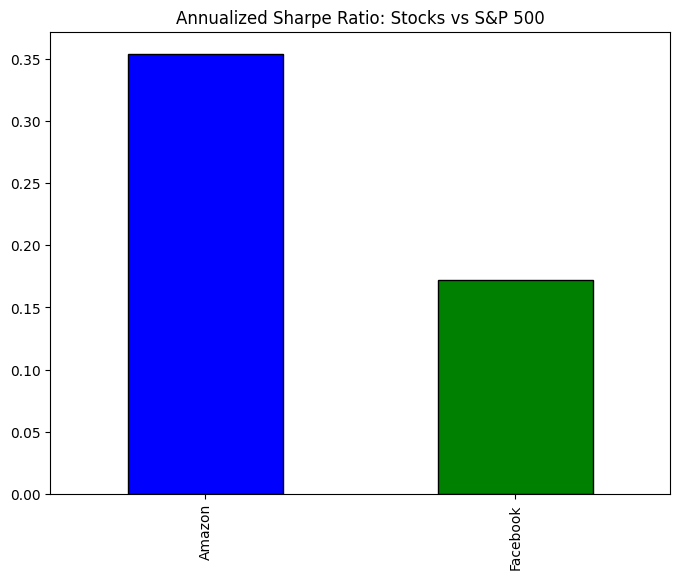

In [18]:
# Calculate the daily Sharpe ratio
daily_sharpe_ratio = avg_excess_return / sd_excess_return

# Annualize the Sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio * annual_factor

# Plot the annualized Sharpe ratio as a bar chart 
ax = annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500', color=['blue', 'green'], grid=False, figsize=(8, 6), edgecolor='black')
ax.yaxis.grid(False)

# Display the plot
plt.show()


# **Observations**

**2016 Comparison:**
* In 2016, Amazon's Sharpe ratio was twice that of Facebook's.
* This indicates Amazon's return was double compared to the S&P 500 for each unit of risk taken.
* In terms of risk-adjusted returns, Amazon appears more attractive.

**Factors Driving the Difference:**
* The disparity in Sharpe ratios is primarily influenced by return differences rather than risk.
* The risk of choosing Amazon over Facebook, measured by standard deviation, was only slightly higher.
* Higher Sharpe ratio for Amazon is mainly due to its higher average daily returns.